In [1]:
# importing necessary library
import pandas as pd
import numpy as np

In [2]:
# fetching/reading data 
df = pd.read_csv('data/diabetes.csv', keep_default_na=True)
df.shape

(768, 9)

In [3]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### as per above data, there are so many data are missing which will create a lot's of problems.
# let's fill the missing data

In [5]:
# how many columns are zero..
(df[df.columns.tolist()[:-1]] == 0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

In [6]:
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [7]:
df[df.columns.tolist()[:-1]] = df[df.columns.tolist()[:-1]].replace(0, np.NaN)

print(df.isnull().sum())

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [8]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [9]:
df.mean()

Pregnancies                   4.494673
Glucose                     121.686763
BloodPressure                72.405184
SkinThickness                29.153420
Insulin                     155.548223
BMI                          32.457464
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
dtype: float64

In [10]:
# Fill the missing values
df.fillna(df.mean(), inplace=True)

df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.000000,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1.000000,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8.000000,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1.000000,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,4.494673,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


In [12]:
# Handled missing values successfully.

# let's move to modeling part

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
X = df[df.columns[:-1]].values
Y = df[df.columns[-1]].values
X.shape, Y.shape

((768, 8), (768,))

In [15]:
lr = LogisticRegression(penalty='l1', dual = False, max_iter=110)

In [16]:
# penality : Used to specify the norm used in penalization(regularization)
# dual : Optimal formulation is used to implement for penality l2, prefer dual = false when n_sample > n_feature
# max_iter : Maximun number of iteration taken to converge

In [17]:
#pass the data to logistic model
lr.fit(X, Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=110, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [18]:
y_pred = lr.predict(X)
len(y_pred)

768

In [19]:
# Now time to check the accuracy:
lr.score(X, Y)

0.77734375

# Model Evaluation

In [20]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, roc_auc_score, auc

In [21]:
# true positive / (true positive + false positive)
precision = precision_score(Y, y_pred)
precision

0.7298578199052133

In [22]:
# true positive / (true positive + false negative)
# True positive rate
recall = recall_score(Y, y_pred)
recall

0.5746268656716418

In [23]:
# harmonic mean of precision & recall
f1 = f1_score(Y, y_pred)
f1

0.6430062630480167

In [24]:
# Auc & roc score

auc_roc_score_ = roc_auc_score(Y, y_pred)
auc_roc_score_

0.730313432835821

In [25]:
# Roc curve
fpr_lr, tpr_lr, threshold_lr = roc_curve(Y, y_pred, pos_label=1)
tpr_lr, fpr_lr, threshold_lr

(array([0.        , 0.57462687, 1.        ]),
 array([0.   , 0.114, 1.   ]),
 array([2, 1, 0], dtype=int64))

In [26]:
roc_auc = auc(tpr_lr, fpr_lr)
roc_auc

0.26968656716417916

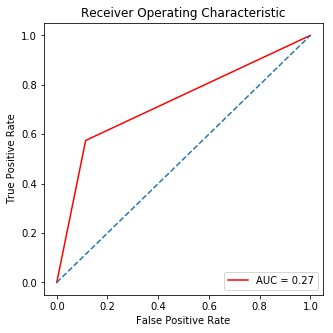

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_lr, tpr_lr, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [28]:
# confusion metrix
from sklearn.metrics import confusion_matrix

confusion_matrix(Y, y_pred)

array([[443,  57],
       [114, 154]], dtype=int64)

# Optimize fine tune the hyper parameters

In [29]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [30]:
# Build k-fold cross validation
kfold = KFold(n_splits=3, random_state=7)


In [31]:
# let's see the result
score = cross_val_score(lr, X, Y, cv=kfold, scoring='accuracy')

print(score.mean())

0.765625


# Let's build another LR model, but this time hyper parametes will be tuned. 

# Start with Grid search


In [32]:
from sklearn.model_selection import GridSearchCV

In [33]:
# define the grid values of hyper parameters
dual = [False, True]
max_iter = [100, 110, 120, 130, 140]

param_grid = dict(dual=dual, max_iter=max_iter)

In [34]:
import time

lr = LogisticRegression(penalty='l2')

grid = GridSearchCV(estimator=lr, param_grid=param_grid, cv = 3, n_jobs=-1)

start_time = time.time()

grid_result = grid.fit(X, Y)

print("Best: %f using %s: " %(grid_result.best_score_, grid_result.best_params_))

print("Total time taken: %s ms" % (time.time()-start_time ))

Best: 0.756510 using {'dual': False, 'max_iter': 100}: 
Total time taken: 3.8157665729522705 ms


# Now will define larger grid hyperparameters and will see the result

In [35]:
dual=[True,False]
max_iter=[100,110,120,130,140]
C = [1.0,1.5,2.0,2.5]
param_grid = dict(dual=dual,max_iter=max_iter,C=C)

In [36]:

lr = LogisticRegression(penalty='l2')

grid = GridSearchCV(estimator=lr, param_grid=param_grid, cv=3, n_jobs=-1)

start_time = time.time()

grid_result = grid.fit(X, Y)

print("Best: %f using %s: " %(grid_result.best_score_, grid_result.best_params_))

print("Total time taken: %s ms" % (time.time()-start_time ))

Best: 0.769531 using {'C': 2.5, 'dual': False, 'max_iter': 100}: 
Total time taken: 3.88835072517395 ms


In [37]:
# As we saw that grid search is taking huge time

# Let's move to other technique for hyperparameter tuning

## Randomized Search

In [38]:
from sklearn.model_selection import RandomizedSearchCV

In [39]:
random = RandomizedSearchCV(estimator=lr, param_distributions=param_grid, cv = 3, n_jobs=-1)

start_time = time.time()

random_result = random.fit(X, Y)

print("Best: %f using %s: " %(random_result.best_score_, random_result.best_params_))

print("Total time taken: %s ms" % (time.time()-start_time ))

Best: 0.769531 using {'max_iter': 130, 'dual': False, 'C': 2.5}: 
Total time taken: 4.443225383758545 ms


In [40]:
# Wah!!, Random search yeild same accuracy but in much faster time

# Conclusion